In [32]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from random import randint
import seaborn as sns
import statistics

Информация взята тут: <https://studbooks.net/1104519/agropromyshlennost/metody_ucheta_rasprostranyonnosti_razvitiya_bolezney>

https://www.pesticidy.ru/%D0%9F%D0%B0%D1%80%D1%88%D0%B0_%D1%8F%D0%B1%D0%BB%D0%BE%D0%BD%D0%B8

На основе данных выведена скорость прорастания спор в процентном соотношении

Споры прорастают только при влажности выше 70% и температуре от 0°C до 30°C.

Функция, которая лежит в основе алгоритма: 
$$
f(t)= \left\{ 
\begin{array}{c}
t * {100\over 19}, & t ∈ (0;19] \\ 
-t*{3000\over 330} + {3000\over 11}, & t ∈ (19;30) \\
-1, & t ∈ (-\infty; 0] ⋃ [30; +\infty)
\end{array}
\right.
$$ 

t - среднесуточная температура за сегодня

Функция выдает -1 когда никто не размножается

In [22]:
hum = [81.38, 54.13, 57.5, 49.75, 58.38, 55.88, 53.13, 55.25, 
            48.63, 45, 63, 51.25, 41.63, 55.63, 57, 51.25, 50.63,
            54.63, 61, 63.63, 73.38, 83, 81.25, 72, 88.25, 65.75,
            47.88, 65.75, 50.5, 49.75, 82.75, 60.88, 65.5, 87.13,
            58.63, 68.5, 56.25, 57.5, 59.38, 57.38, 48.38, 43.75,
            42.75, 46.13, 45.88, 46.75, 48.75, 47.25, 41.88, 41.5,
            53.38, 53.13, 52.63, 83.75, 83.5, 62.13, 61.75, 54.38,
            65.88, 84.88, 88.38, 68.25, 65.13, 57.25, 51.13, 64.25,
            61.13, 75.25, 75.38, 58.25, 74.5, 76.63, 75.38, 88.63,
            87.38, 87.25, 74.88, 65.25, 81.88, 78.5, 68.63, 64, 62.25,
            77.38, 87.88, 80.75, 90, 78.38, 92.88, 90.88, 72.88, 69.5]
len(hum)

92

In [3]:
temp = [7, 15.5, 13.5, 15.5, 10.5, 6.8, 8.5, 11.5,
        15, 16.5, 17, 20.5, 22.5, 17, 20, 20, 22.5, 24.5, 
        16.5, 15, 16, 15.5, 15.5, 21.5, 21, 24, 21.5, 15.5, 
        21.5, 22, 9, 22, 21.5, 6, 15.5, 17.5, 18, 22, 23, 24, 
        16.5, 17.5, 19.5, 22, 25, 27.5, 28, 28, 25, 23.5, 23, 
        22, 27, 17, 17.5, 22.5, 24, 22, 17, 21.5, 20, 25.5, 23,
        24.5, 27.5, 23.5, 23.5, 25, 17.5, 15, 16, 16.5, 14.5, 
        15.5, 23.5, 28, 27.5, 19, 21, 21, 22.5, 18.5, 14, 24,
        25, 24.5, 25.5, 14.5, 23.5, 27]


In [28]:
#def time_to_grow(hum,temp):
percent_growth = []
    #index = 0
for i in range(len(temp)):
    if hum[i] > 70 and temp[i] > 0 and temp[i] <= 19: # если условие выполняется, то зависимость линейна от температуры
        index = temp[i] * 100/19
        percent_growth.append(round(index,2))
    else: 
        if hum[i] > 70 and temp[i] > 19 and temp[i] < 30:
            index = -temp[i] * 3000/330 + 3000/11
            percent_growth.append(round(index,2))
        else:
            if hum[i] < 70 or -3 < temp[i] >= 0 or 30 <= temp[i] < 32: 
                index = percent_growth[i-1]
                percent_growth.append(index)
            else:
                if hum[i] < 70 or temp[i] <= -3 or  temp[i] >= 32: 
                    index = 0
                    percent_growth.append(index)
#return percent_growth

In [29]:
percent_growth

[36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 36.84,
 84.21,
 81.58,
 81.58,
 77.27,
 81.82,
 81.82,
 81.82,
 81.82,
 81.82,
 81.82,
 47.37,
 47.37,
 47.37,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 31.58,
 89.47,
 92.11,
 92.11,
 92.11,
 92.11,
 92.11,
 77.27,
 90.91,
 90.91,
 90.91,
 90.91,
 90.91,
 90.91,
 90.91,
 45.45,
 92.11,
 92.11,
 84.21,
 86.84,
 76.32,
 81.58,
 59.09,
 18.18,
 22.73,
 22.73,
 81.82,
 81.82,
 81.82,
 81.82,
 81.82,
 54.55,
 45.45,
 50.0,
 40.91,
 76.32,
 59.09,
 27.27]

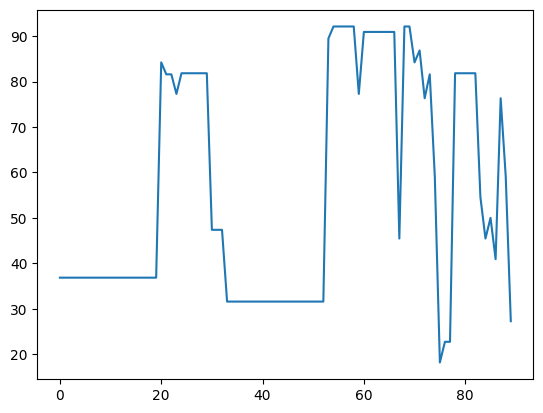

In [58]:
xfmt = mdates.DateFormatter('%d-%m')
ax.xaxis.set_major_formatter(xfmt)
times = pd.date_range('2023-05-01', end = '2023-07-31', freq='5min')

time = [i for i in range(90)]
plt.plot(time, percent_growth, linestyle='-')
plt.show()

Информация взята тут: <http://berrylib.ru/books/item/f00/s00/z0000040/st004.shtml>

На основе данных выведена функция описывающая зависимость длины инкубационного периода от температуры

Входными данными является список из среднесуточных температур, снятых с датчика.
```
temp = []
for i in range(20):
    temp.append(randint(-30, 30))
```
 - симмуляция списка среднесуточных температур.

 `mean = (temp[-1]+temp[-2]+temp[-3]+temp[-4]+temp[-5]) / 5` - находим среднее значение тмпературы за последние 5 дней.

Условия для работоспособности зависисмости:    $$0 > mean > 25$$  (mean - средняя температура за последние 5 дней)

Функция зависимости:  

 $$
f(m)= \left\{ 
\begin{array}{c}
|24 - m| * {2\over 3} + 6, & m ∈ (0;25] \\ 
-1, & m ∈ (-\infty; 0] ⋃ (25; +\infty)
\end{array}
\right.
$$

m - mean -  средняя температура за последние 5 дней.

In [ ]:
temp = []
for i in range(20):
    temp.append(randint(-30, 30))
def parshas_incubation_period(temp):
    #mean = (temp[-1]+temp[-2]+temp[-3]+temp[-4]+temp[-5]) / 5
#    if mean > 0 and mean <= 25:
#        len_incubation_period = abs((24-mean)*2 / 3) + 6
#        return len_incubation_period
#    else: 
#        return -1
    if temp > 0 and temp <= 25:
        len_incubation_period = abs((24-temp)*2 / 3) + 6
        return len_incubation_period
    else: 
        return -1

In [22]:
humidity = [81.38, 54.13, 57.5, 49.75, 58.38, 55.88, 53.13, 55.25, 
            48.63, 45, 63, 51.25, 41.63, 55.63, 57, 51.25, 50.63,
            54.63, 61, 63.63, 73.38, 83, 81.25, 72, 88.25, 65.75,
            47.88, 65.75, 50.5, 49.75, 82.75, 60.88, 65.5, 87.13,
            58.63, 68.5, 56.25, 57.5, 59.38, 57.38, 48.38, 43.75,
            42.75, 46.13, 45.88, 46.75, 48.75, 47.25, 41.88, 41.5,
            53.38, 53.13, 52.63, 83.75, 83.5, 62.13, 61.75, 54.38,
            65.88, 84.88, 88.38, 68.25, 65.13, 57.25, 51.13, 64.25,
            61.13, 75.25, 75.38, 58.25, 74.5, 76.63, 75.38, 88.63,
            87.38, 87.25, 74.88, 65.25, 81.88, 78.5, 68.63, 64, 62.25,
            77.38, 87.88, 80.75, 90, 78.38, 92.88, 90.88, 72.88, 69.5]


In [ ]:
temp = [7, 15.5, 13.5, 15.5, 10.5, 6.8, 8.5, 11.5,
        15, 16.5, 17, 20.5, 22.5, 17, 20, 20, 22.5, 24.5, 
        16.5, 15, 16, 15.5, 15.5, 21.5, 21, 24, 21.5, 15.5, 
        21.5, 22, 9, 22, 21.5, 6, 15.5, 17.5, 18, 22, 23, 24, 
        16.5, 17.5, 19.5, 22, 25, 27.5, 28, 28, 25, 23.5, 23, 
        22, 27, 17, 17.5, 22.5, 24, 22, 17, 21.5, 20, 25.5, 23,
        24.5, 27.5, 23.5, 23.5, 25, 17.5, 15, 16, 16.5, 14.5, 
        15.5, 23.5, 28, 27.5, 19, 21, 21, 22.5, 18.5, 14, 24,
        25, 24.5, 25.5, 14.5, 23.5, 27]

incubation_time = []
for i in range(len(temp)):    
    percent = round(parshas_incubation_period(temp[i]),2)
    incubation_time.append(percent)
incubation_time

[17.33,
 11.67,
 13.0,
 11.67,
 15.0,
 17.47,
 16.33,
 14.33,
 12.0,
 11.0,
 10.67,
 8.33,
 7.0,
 10.67,
 8.67,
 8.67,
 7.0,
 6.33,
 11.0,
 12.0,
 11.33,
 11.67,
 11.67,
 7.67,
 8.0,
 6.0,
 7.67,
 11.67,
 7.67,
 7.33,
 16.0,
 7.33,
 7.67,
 18.0,
 11.67,
 10.33,
 10.0,
 7.33,
 6.67,
 6.0,
 11.0,
 10.33,
 9.0,
 7.33,
 6.67,
 -1,
 -1,
 -1,
 6.67,
 6.33,
 6.67,
 7.33,
 -1,
 10.67,
 10.33,
 7.0,
 6.0,
 7.33,
 10.67,
 7.67,
 8.67,
 -1,
 6.67,
 6.33,
 -1,
 6.33,
 6.33,
 6.67,
 10.33,
 12.0,
 11.33,
 11.0,
 12.33,
 11.67,
 6.33,
 -1,
 -1,
 9.33,
 8.0,
 8.0,
 7.0,
 9.67,
 12.67,
 6.0,
 6.67,
 6.33,
 -1,
 12.33,
 6.33,
 -1]

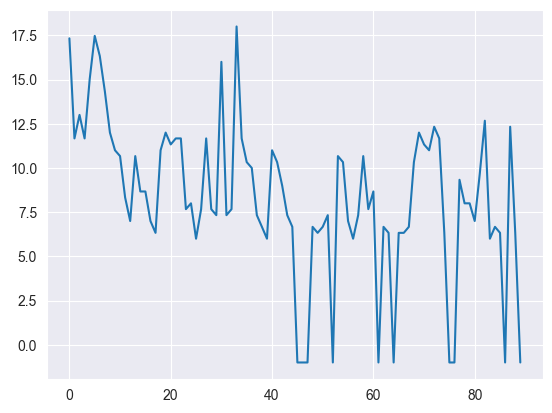

In [ ]:
time = [i for i in range(90)]
plt.plot(time, incubation_time, linestyle='-')
plt.show()